## Determine analog voltage offset of SO2 analyzer

#### Teledyne T100U, ser no. 203

> Patrick O'Keeffe <pokeeffe@wsu.edu>  
> Laboratory for Atmospheric Research  
> Washington State University

Data collected with analyzers sampling ambient air from Paccar roof. 

* logger used wrong scaling values: assumed 0-100ppb over 0-5V but actual range was 0-10V &rarr; halve the reported concentration values
* logger clock was not updated prior to data collected and has a very large offset to fix &rarr; add timestamp offset to logger
* logger and analyzer recorded on different time intervals &rarr; resample time-corrected analog voltage data down to 1-min average
* analyzer ADC has voltage bias &rarr; temporally correlate analog to digital measurements and apply linear scaling correction

### Setup & Import

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def read_TOA5(fpath, **kwargs):
    """Import TOA5-formatted data file"""
    df = pd.read_csv(fpath,
                     index_col=0, parse_dates=True,
                     # don't allow falling back to string-index
                     date_parser=lambda ts: pd.to_datetime(ts, errors='coerce',
                                                    format='%Y-%m-%d %H:%M:%S'),
                     header=1, skiprows=[2,3],
                     na_values=['NAN', 7999, -7999],
                     *kwargs)

    if df.index.has_duplicates:
        df = df.groupby(level=0).median()
    if not df.index.is_monotonic:
        df = df.sort_index()
    
    # shift timestamp from end-of-period to start-of-period
    df = df.tshift(-1, df.index.inferred_freq)
    
    return df.drop(['RECORD'], axis=1, errors='ignore')

In [4]:
analog = read_TOA5('./CR6Series_tsdata.dat')
analog

,m405_NO2,m405_NO,m405_NOx,m405_NO2_zero,m405_NO_zero,m405_flow_factor,m405_cell_T,m405_cell_P,m405_overflow_F,m405_cell_F,...,li840a_CO2,li840a_H2O,li840a_cell_T,li840a_cell_P,li840a_dewpoint,li840a_pwr_src,flush_massFlow,flush_tmpr,flush_press,t100u_so2
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-10-14 16:12:45,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.3,4.283,3850.0,857.6470,-6.864,17.10,12.39,24.13,82.50,1.704586
2017-10-14 16:12:50,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,407.2,4.288,6550.0,857.7830,-6.848,17.30,42.33,24.22,80.20,1.714941
2017-10-14 16:12:55,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.2,4.281,3850.0,857.7150,-6.870,17.32,2.91,24.26,85.90,1.714655
2017-10-14 16:13:00,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.1,4.281,3850.0,857.4640,-6.873,17.17,4.92,24.21,85.70,1.714362
2017-10-14 16:13:05,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.2,4.281,5200.0,857.9180,-6.866,17.09,34.57,24.25,81.70,1.425505
2017-10-14 16:13:10,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.4,4.275,3850.0,857.9860,-6.883,17.30,10.97,24.41,82.80,1.617428
2017-10-14 16:13:15,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.5,4.287,3850.0,857.7830,-6.849,17.20,6.23,24.26,86.50,1.711004
2017-10-14 16:13:20,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.6,4.286,3850.0,857.6429,-6.855,17.07,26.08,24.22,83.00,1.700232
2017-10-14 16:13:25,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.3,4.288,3850.0,858.0100,-6.843,17.25,42.14,24.19,80.00,1.711101


In [5]:
def read_APICOM_csv(filepath, col_names):
    df =  pd.read_csv(filepath,
                      header=0, # names 1st row
                      names=col_names, # make user rename them
                      index_col=0, # timestamps 1st col
                      parse_dates=True, # US format (MM/DD/YYYY)
                      skipinitialspace=True) # has spaces and commas
    
    df = df.resample('T').first() # move timestamp to start of minute
    df = df.tshift(-1, freq='T') # relabel as start-of-period timestamp
    if len(df.index.get_duplicates()):
        df = df.groupby(level=0).first()
    return df

In [6]:
digital = read_APICOM_csv('./SO2-203 -1MIND-CONC1-20171213-1.csv', ['timestamp', 'so2_Avg', 'so2_stabil_Avg'])
digital = digital['20171201':]   # discard data from previous months
digital

,so2_Avg,so2_stabil_Avg
timestamp,,
2017-12-01 00:00:00,NaN,NaN
2017-12-01 00:01:00,NaN,NaN
2017-12-01 00:02:00,NaN,NaN
2017-12-01 00:03:00,NaN,NaN
2017-12-01 00:04:00,NaN,NaN
2017-12-01 00:05:00,NaN,NaN
2017-12-01 00:06:00,NaN,NaN
2017-12-01 00:07:00,NaN,NaN
2017-12-01 00:08:00,NaN,NaN


### Apply fixes

#### Voltage Scaling

Since true voltage output range from analyzer was 0-10V, but datalogger assumed scaling occured over range of 0-5V, the reported scaled concentration values are a factor of 2 larger than they should be. To fix this, simply halve all the scaled concentration values.

![Voltage scaling diagram](voltage_scaling.png)

In [7]:
analog.t100u_so2[:5]

TIMESTAMP
2017-10-14 16:12:45    1.704586
2017-10-14 16:12:50    1.714941
2017-10-14 16:12:55    1.714655
2017-10-14 16:13:00    1.714362
2017-10-14 16:13:05    1.425505
Freq: 5S, Name: t100u_so2, dtype: float64

In [8]:
analog.t100u_so2 /= 2

In [9]:
analog.t100u_so2[:5]

TIMESTAMP
2017-10-14 16:12:45    0.852293
2017-10-14 16:12:50    0.857471
2017-10-14 16:12:55    0.857327
2017-10-14 16:13:00    0.857181
2017-10-14 16:13:05    0.712753
Freq: 5S, Name: t100u_so2, dtype: float64

#### Timestamp offsets

Based on simultaneous clock observation, the logger is 4,942,678 seconds behind the analyzer:
    
| | |
|-|-|
| Logger   | 2017-10-27 07:02:27 |
| Analyzer | 2017-12-13 12:00:25 |
| *Diff*   | 4942678s (=57d 17878s) |

In [10]:
from datetime import datetime
logger_ts = '2017-10-17 07:02:27'
so2_ts    = '2017-12-13 12:00:25'
FMT = '%Y-%m-%d %H:%M:%S'

offset = datetime.strptime(so2_ts, FMT) - datetime.strptime(logger_ts, FMT)
offset

datetime.timedelta(57, 17878)

Is the ending timestamp approximately the time of data file collection/creation? 14:38 on Dec 11, 2017

In [11]:
analog.index[-1] + offset

Timestamp('2017-12-11 14:41:53', offset='5S')

Great, now permanently apply the offset:

In [12]:
analog.index += offset
analog

,m405_NO2,m405_NO,m405_NOx,m405_NO2_zero,m405_NO_zero,m405_flow_factor,m405_cell_T,m405_cell_P,m405_overflow_F,m405_cell_F,...,li840a_CO2,li840a_H2O,li840a_cell_T,li840a_cell_P,li840a_dewpoint,li840a_pwr_src,flush_massFlow,flush_tmpr,flush_press,t100u_so2
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-12-10 21:10:43,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.3,4.283,3850.0,857.6470,-6.864,17.10,12.39,24.13,82.50,0.852293
2017-12-10 21:10:48,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,407.2,4.288,6550.0,857.7830,-6.848,17.30,42.33,24.22,80.20,0.857471
2017-12-10 21:10:53,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.2,4.281,3850.0,857.7150,-6.870,17.32,2.91,24.26,85.90,0.857327
2017-12-10 21:10:58,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.1,4.281,3850.0,857.4640,-6.873,17.17,4.92,24.21,85.70,0.857181
2017-12-10 21:11:03,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.2,4.281,5200.0,857.9180,-6.866,17.09,34.57,24.25,81.70,0.712753
2017-12-10 21:11:08,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.4,4.275,3850.0,857.9860,-6.883,17.30,10.97,24.41,82.80,0.808714
2017-12-10 21:11:13,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.5,4.287,3850.0,857.7830,-6.849,17.20,6.23,24.26,86.50,0.855502
2017-12-10 21:11:18,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.6,4.286,3850.0,857.6429,-6.855,17.07,26.08,24.22,83.00,0.850116
2017-12-10 21:11:23,-40.4,3.6,-36.8,0,0,1.06,31.4,903.5,170,2261,...,406.3,4.288,3850.0,858.0100,-6.843,17.25,42.14,24.19,80.00,0.855550


#### Record Interval Alignment

Resample the logger data set down from 5sec to 1-min record interval.

In [23]:
analog = analog.resample('T').mean()
analog

,m405_NO2,m405_NO,m405_NOx,m405_NO2_zero,m405_NO_zero,m405_flow_factor,m405_cell_T,m405_cell_P,m405_overflow_F,m405_cell_F,...,li840a_CO2,li840a_H2O,li840a_cell_T,li840a_cell_P,li840a_dewpoint,li840a_pwr_src,flush_massFlow,flush_tmpr,flush_press,t100u_so2
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-12-10 21:10:00,-40.400000,3.600000,-36.800000,0.0,0.0,1.06,31.400000,903.500000,170.000000,2261.000000,...,406.450000,4.283250,4525.000000,857.652250,-6.863750,17.222500,15.637500,24.205000,83.575000,0.856068
2017-12-10 21:11:00,-36.108333,0.850000,-35.300000,0.0,0.0,1.06,31.400000,903.500000,170.416667,2260.583333,...,406.358333,4.286000,3985.000000,857.930658,-6.850333,17.177500,65.097500,-4.190000,122.158333,0.824617
2017-12-10 21:12:00,-31.683333,0.541667,-31.200000,0.0,0.0,1.06,31.400000,903.500000,170.583333,2259.583333,...,406.145455,4.294273,3965.181818,857.991818,-6.824727,17.196364,14.815833,24.260000,84.100000,0.826081
2017-12-10 21:13:00,-34.900000,5.916667,-28.983333,0.0,0.0,1.06,31.400000,903.500000,170.000000,2259.833333,...,406.308333,4.298000,3973.636364,857.970417,-6.813583,17.213333,20.806364,24.215455,82.981818,0.838317
2017-12-10 21:14:00,-36.675000,4.833333,-31.841667,0.0,0.0,1.06,31.400000,903.500000,170.000000,2260.166667,...,406.509091,4.291455,4275.916667,857.845718,-6.834909,17.220000,19.005455,24.273636,83.590909,0.790992
2017-12-10 21:15:00,-33.783333,1.791667,-31.950000,0.0,0.0,1.06,31.400000,903.500000,170.416667,2259.416667,...,406.400000,4.319667,4186.666667,857.876333,-6.749250,17.235833,18.140000,24.236667,83.641667,0.760198
2017-12-10 21:16:00,-31.208333,-0.700000,-31.850000,0.0,0.0,1.06,31.400000,903.500000,170.166667,2260.000000,...,406.258333,4.332333,4188.333333,858.128425,-6.707417,17.220833,54.753333,-2.906667,123.066667,0.771210
2017-12-10 21:17:00,-34.841667,-1.300000,-36.141667,0.0,0.0,1.06,31.400000,903.500000,169.000000,2260.416667,...,406.400000,4.311417,3973.636364,858.110008,-6.771083,17.250833,70.967500,-3.756667,125.825000,0.768720
2017-12-10 21:18:00,-31.975000,0.341667,-31.633333,0.0,0.0,1.06,31.400000,903.500000,169.833333,2261.000000,...,406.425000,4.293667,4187.500000,858.075908,-6.825083,17.225833,15.932727,24.245455,83.627273,0.757234


#### Voltage Bias

Compare simultaneous analog voltage and digital data values to identify intrinsic biases in analyzer ADC hardware.

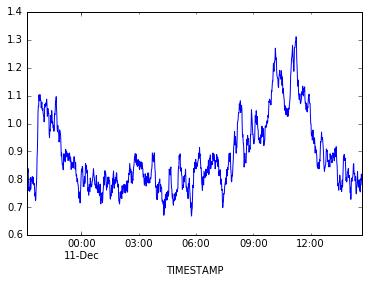

In [24]:
a = analog.t100u_so2
a.plot()

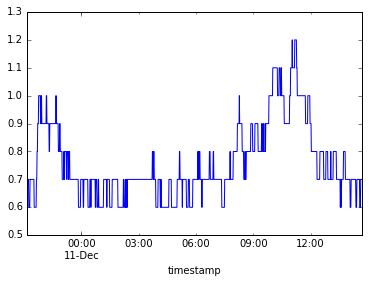

In [25]:
d = digital[analog.index[0]:analog.index[-1]].so2_Avg
d.plot()

In [17]:
import matplotlib.pylab as plt

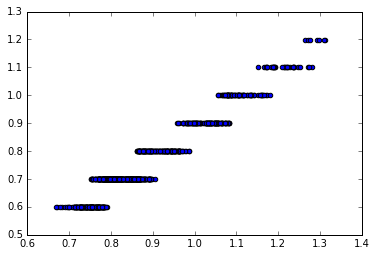

In [27]:
plt.scatter(a, d)

In [29]:
from scipy.stats import linregress
linregress(a, d)

LinregressResult(slope=0.99582515754419332, intercept=-0.12052825576325266, rvalue=0.96594974499898822, pvalue=0.0, stderr=0.0082315250136285531)

With relative confidence, the voltage bias of the ADC represents an offset of -0.1 ppb. This represents less than the RMS Zero Noise (as defined by USEPA) and is easily compensated for by using an offset value of `+0.1ppb` in the logger code. 